In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
import math




import pandas as pd
import numpy as np
import env
import acquire
import prepare

## Project Planning

- Data dictionary

**internet_service_type_id:** type of internet service a customer has with the options of DSL = 1, Fiber Optic = 2, None = 3 

**payment_type_id:** type of payment setup for a customer the options of Electronic Check = 1, Mailed Check = 2, Bank Transfer = 3, Credit Card = 4 

**contract_type_id:** type of contract selected by a customer with the options of Month-to-Month = 1, One Year = 2, Two Year = 3

**customer_id:** unique identifier for each customer having 10 characters

**gender:** whether a customer is male or female with male = 0 and female = 1

**senior_citizen:** whether a customer is a senior or not with not being a senior = 0 and being a senior = 1 

**partner:** whether a customer has a partner or not with not having having a partner = 0 and having a partner = 1

**dependents:** whether a customer has any dependents or not with not having having any dependents = 0 and having a dependent = 1

**tenure:** number of months a customer was/or continues to be a customer

**tenure_year:** number of years a customer was/or continues to be a customer. A created feature rounding up the number of months to the next year 

**phone_service:** whether a customer has phone service or not with not having any phone service = 0 and having phone service = 1

**multiple_lines:** whether a customer has multiple phone lines or not with not having multiple phone lines = 0 and having multiple phone lines = 1

**online_security:** whether a customer has online security or not with not having any online security = 0 and having online security = 1

**online_backup:** whether a customer has online backup or not with not having any online backup = 0 and having online backup = 1

**device_security:** whether a customer has device security or not with not having any device security = 0 and having device security = 1

**tech_support:** whether a customer has tech support or not with not having any tech support = 0 and having tech support = 1

**streaming_tv:** whether a customer has streaming tv service or not with not having any streaming tv service = 0 and having streaming tv service = 1

**streaming_movies:** whether a customer has streaming movies service or not with not having any streaming movies service = 0 and having streaming movies service = 1

**paperless_billing:** whether a customer has paperless billing or not with not having paperless_billing active = 0 and having having paperless_billing active = 1

**monthly_charges:** amount of charges per month

**total_charges:** amount of charges over full tenure as customer

**churn:** whether or not a customer defected with having not churned = 0 and had churned = 1

## Acquire

- Acquire data from the customers table from the telco_churn database on the codeup data science database server

In [2]:
df = acquire.get_telco_data()

- General churn rate

In [3]:
# calculate the average rate of churn
basic_churn = df.churn.value_counts()
basic_churn_df = pd.DataFrame(basic_churn) 
basic_churn_df

,churn
No,5174
Yes,1869


In [4]:
# Find average churn rate
churn_rate_bl = 1869/7043
churn_rate_bl

0.2653698707936959

**Note:** If I was to selectively guess that every customer would not churn then I would be correct 73% of the time

## Prep Baseline Data

In [5]:
# Determine data types
# Note total_charges is an object
df.dtypes

internet_service_type_id      int64
payment_type_id               int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
payment_type                 object
internet_service_type        object
dtype: object

In [6]:
# Clean data by converting total_charges to a float and drop null/nan
df = prepare.clean_data(df)

In [7]:
# Encode the churn column for the entire dataframe
df = prepare.encoder(df)

In [8]:
# Create feature tenure_year that converts monthly tenure into years
df["tenure_year"] = np.ceil(df.tenure / 12)

**Task:** I need to select which variables, pick a model and run the data

- Split my data into a .80 train / test .20 split and use a random state = 123
- Drop non numeric colums

In [9]:
# Function split_my_data_bl() in prepare.py:

# Drops columns = "customer_id", "gender", "partner", "dependents", "phone_service", \
# "multiple_lines", "online_security", "online_backup", "device_protection", "tech_support", \
# "streaming_tv", "streaming_movies" "paperless_billing", "contract_type", "payment_type", "internet_service_type"

# Splits data into X (mult. variables), y (target), and into train and test dataframes

X, y, X_train, X_test, y_train, y_test = prepare.split_my_data_bl(df)

- Use a Decision Tree Model with the criterion='gini', max depth = 3, and random state = 123

In [10]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [11]:
# Predict churn

y_pred = clf.predict(X_train)

In [12]:
# Probability of churn

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.91489362, 0.08510638],
       [0.91489362, 0.08510638],
       [0.30799476, 0.69200524],
       ...,
       [0.92966002, 0.07033998],
       [0.59355509, 0.40644491],
       [0.30799476, 0.69200524]])

- Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [13]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [14]:
confusion_matrix(y_train, y_pred)

array([[3898,  235],
       [ 964,  528]])

In [15]:
# Confusion matrix with labels
labels = sorted(y_train.churn.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,3898,235
1,964,528


In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      4133
           1       0.69      0.35      0.47      1492

    accuracy                           0.79      5625
   macro avg       0.75      0.65      0.67      5625
weighted avg       0.77      0.79      0.76      5625



**Note:** Baseline is better than guessing everyone will churn 79% > 73% 

## Explore

- Goal is to answer required questions, create visulizations, test features to create a better model in the next phase of the pipeline which will perform better than the baseline

In [17]:
# Function encoder_all() in prepare.py to encode select variables, drop columns = contract_type, \
# internet_service_type, payment_type, and creates a dataframe

df_encoded = prepare.encoder_all(df)

In [18]:
# split my encoded dataframe into a train and test set
train, test = train_test_split(df_encoded, train_size =.80, random_state = 123)

**Question 1.** Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))

- Evaluate tenure length vs. churn

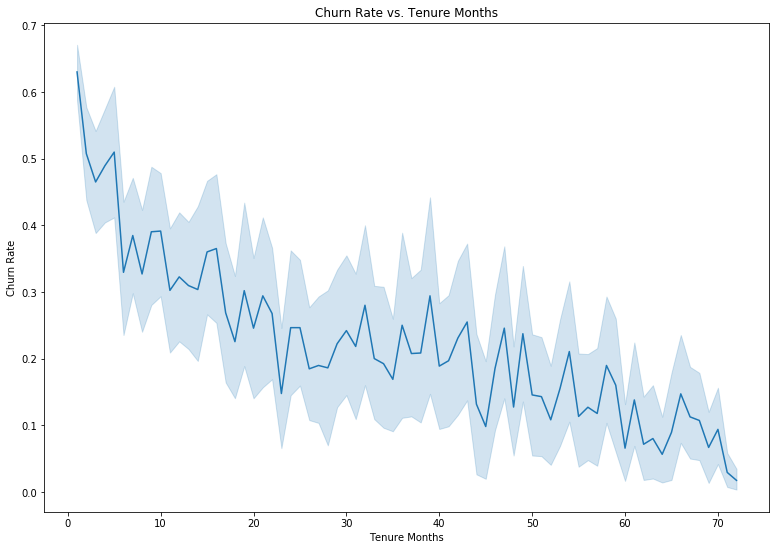

In [19]:
plt.figure(figsize=(13,9))
ax = sns.lineplot(x="tenure", y= "churn", data=train)
plt.title("Churn Rate vs. Tenure Months")
ax.set_xlabel("Tenure Months")
ax.set_ylabel("Churn Rate")
plt.show()

- Evaluate tenure years vs. churn

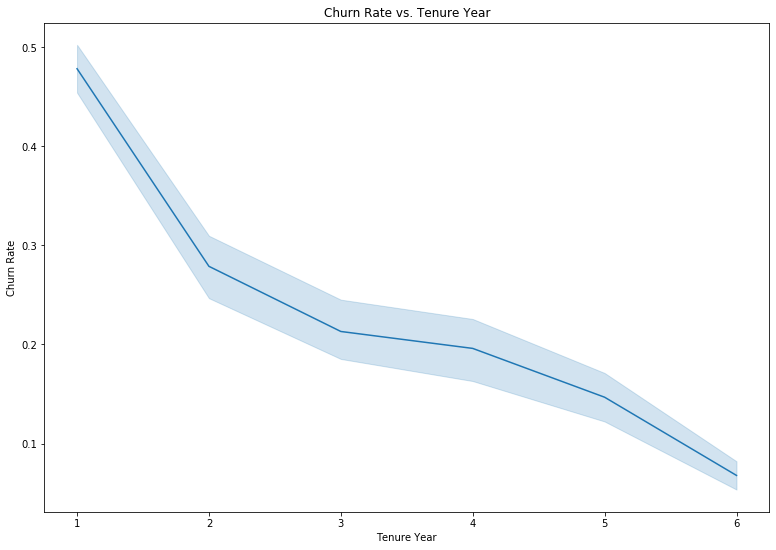

In [20]:
plt.figure(figsize=(13,9))
ax = sns.lineplot(x="tenure_year", y= "churn", data=train)
plt.title("Churn Rate vs. Tenure Year")
ax.set_xlabel("Tenure Year")
ax.set_ylabel("Churn Rate")
plt.show()

**Findings:** The churn rate is very high for customers in the early tenure months/years

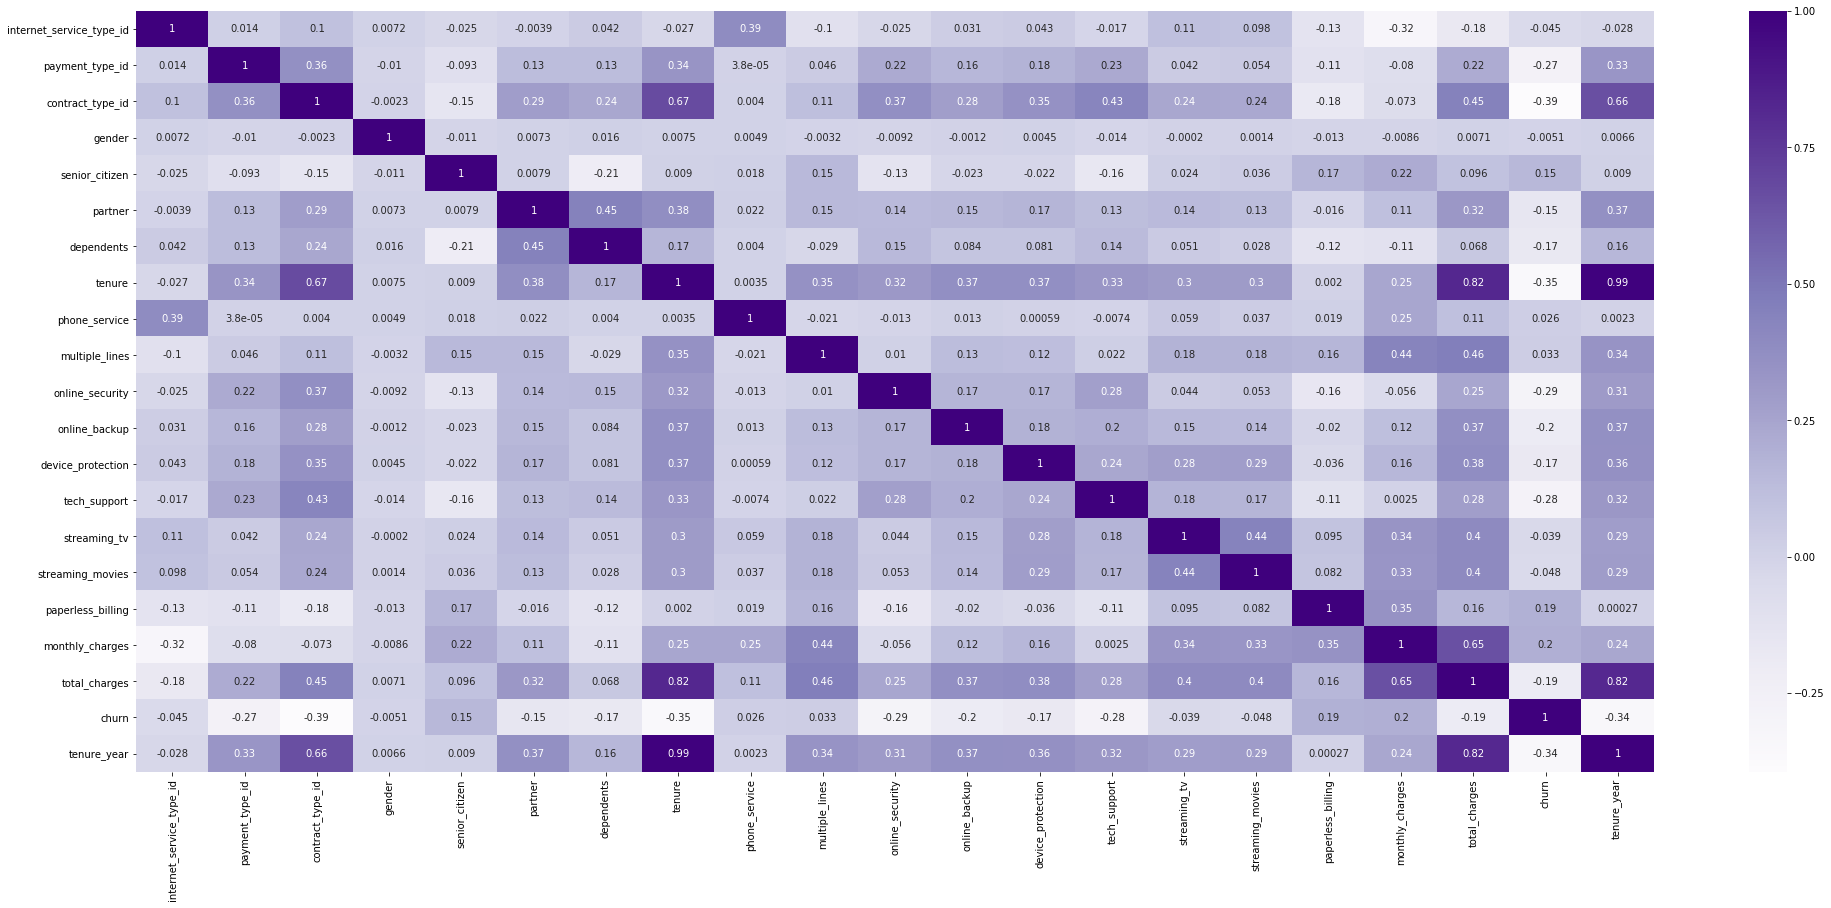

In [21]:
plt.figure(figsize=(34,14))

sns.heatmap(train.corr(), cmap='Purples', annot=True)

**Findings:** Analyzing the churn row/column shows me how very little the other features are correlated with churn. More analysis will be required.

**Question 2.** Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

- Evaluate internet service type and churn rate

Text(0, 0.5, 'Churn Rate')

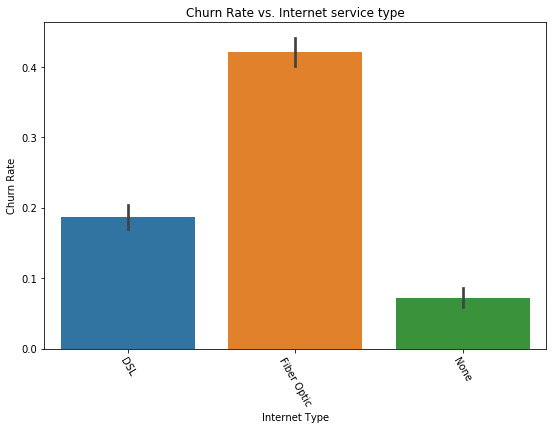

In [22]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x = "internet_service_type_id", y = "churn", data = train)
ax.set_xticklabels(["DSL", "Fiber Optic", "None"])
plt.title("Churn Rate vs. Internet service type")
plt.xticks(rotation = -60)
ax.set_xlabel("Internet Type")
ax.set_ylabel("Churn Rate")

**Findings:** Fiber optic service type does indicate a higher propensity to churn

- Evaluate multiple lines of phone service vs. churn

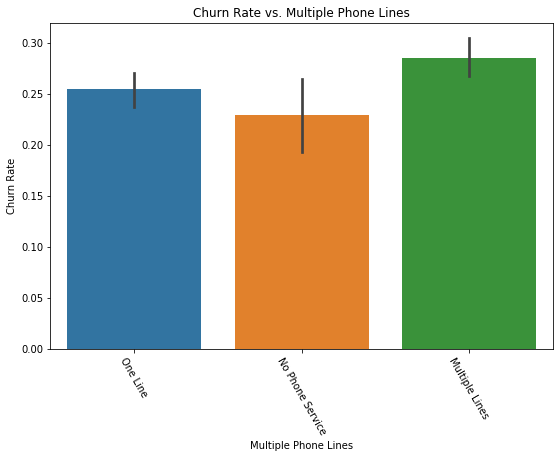

In [23]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x= "multiple_lines", y = "churn", data = train)
plt.xticks(rotation = -60)
plt.title("Churn Rate vs. Multiple Phone Lines")
ax.set_xticklabels(["One Line", "No Phone Service", "Multiple Lines"])
plt.xticks(rotation = -60)
ax.set_xlabel("Multiple Phone Lines")
ax.set_ylabel("Churn Rate")
plt.show()

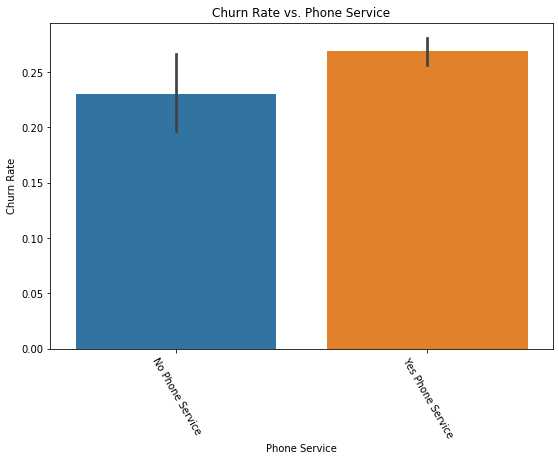

In [24]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x= "phone_service", y = "churn", data = train)
plt.title("Churn Rate vs. Phone Service")
plt.xticks(rotation = -60)
ax.set_xticklabels(["No Phone Service", "Yes Phone Service"])
ax.set_xlabel("Phone Service")
ax.set_ylabel("Churn Rate")
plt.show()

**Findings:** Multiple phone lines service customers are more likely to churn

- Evaluate online security and online backup to churn

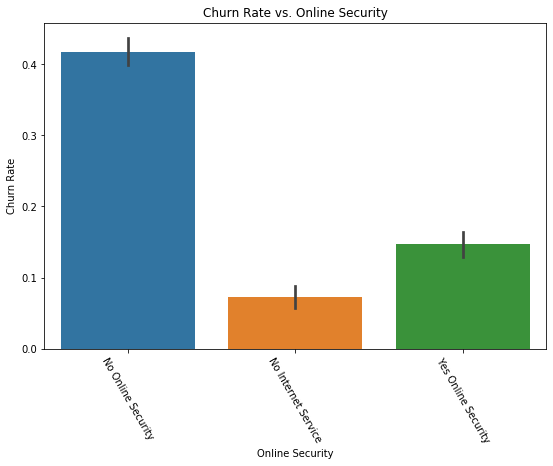

In [25]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Online Security")
ax = sns.barplot(x = "online_security", y = "churn", data = train)
ax.set_xticklabels(["No Online Security","No Internet Service","Yes Online Security"])
ax.set_xlabel("Online Security")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

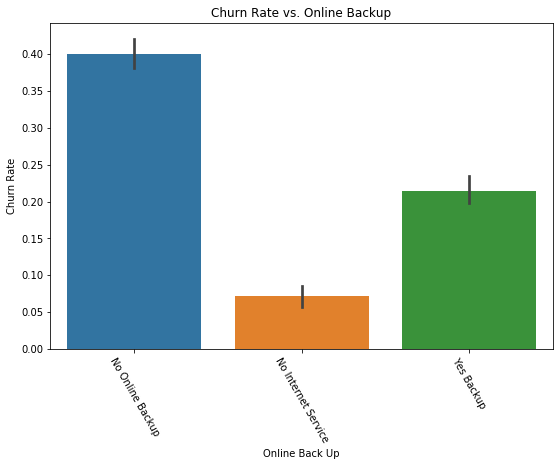

In [26]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Online Backup")
ax = sns.barplot(x = train.online_backup, y = train.churn)
ax.set_xticklabels(["No Online Backup","No Internet Service","Yes Backup"])
ax.set_xlabel("Online Back Up")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

**Findings:** Customers with internet but do not having online security or online backup are likely to churn

- Evaluate senior citizens and churn rate

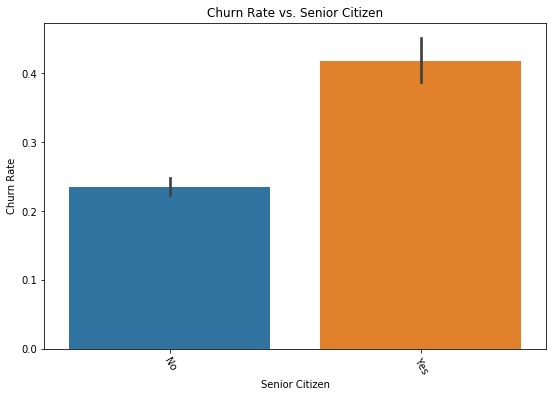

In [27]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Senior Citizen")
ax = sns.barplot(x = train.senior_citizen, y = train.churn)
ax.set_xticklabels(["No","Yes"])
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

**Findings:** Seniors are more likely to churn than non seniors

**Question 3.** Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

**Question 4.** If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

**Question 5.** Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

**Question 6.** How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

**Question 7.** How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

**Question 8.** Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

**Question 9.** What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

After reviewing the correlation chart from above, I believe some of the causes for strong correlations between variables and churn exist because of how customers are contracted, their payment types, and the tenure.  Basically my takeaway is that the strongest controlling factors are how a customer is locked into their contract and how they pay their monthly bill.  I speak from personal experience when thinking about this problem since I have contracted with a telecom company before and understand what keeps me active and causes me to consider churnning.

**Question 10.** Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

- The features that indicate a higher propensity to churn from my analysis are 'online_security', 'online_backup', 'internet_service_type_id', and 'senior'.  To better understand what about these features impact the probability of a customer churning I have to create a customer profile of a churner. 


- A churner most looks like a customer that has fiber optic service, no online services (online security or online backup), and is a senior. 


- An action plan would be to present the findings to the Senior Leadership Team and discuss options for better understanding what options exist to adjust the customer's services to attempt and retain them.

## Model MVP

- Goals of sophisticated modeling is to perform feature selection based on previous findings, train (fit, transform, evaluate) the model, interpret evaluation metrics, and test the final model (only transform and evaluate) 

In [100]:
# Create dataframe with encoded data for use in the modeling phase
# I am dropping columns that provided less value during my exploration phase
# I am encoding the remaining non numeric columns to allow my model to work properly

df_encoded_rf = prepare.encoder_all_rf(df)

df_encoded_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
internet_service_type_id    7032 non-null int64
payment_type_id             7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null int64
dependents                  7032 non-null int64
tenure                      7032 non-null int64
multiple_lines              7032 non-null int64
online_security             7032 non-null int64
online_backup               7032 non-null int64
device_protection           7032 non-null int64
streaming_tv                7032 non-null int64
paperless_billing           7032 non-null int64
monthly_charges             7032 non-null float64
total_charges               7032 non-null float64
churn                       7032 non-null int64
tenure_year                 7032 non-null float64
dtypes: float64(3), in

In [101]:
# split my encoded dataframe into a train and test set

X, y, X_train_rf, X_test_rf, y_train_rf, y_test_rf = prepare.split_my_data_rf(df_encoded_rf)

- Random Forest (1st attempt)

- Fit the Random Forest classifier to the training data and transform (i.e. make predictions on the training data) setting the criterion = 'entropy', random_state = 123, and setting min_samples_leaf = 1 and max_depth = 20

In [89]:
# Train Model
# Create the Random Forest Object

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

In [90]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

- Print Feature Importances

In [91]:
print(rf.feature_importances_)

[0.02785161 0.05993809 0.07839853 0.02219979 0.02512124 0.02189039
 0.14818034 0.02561246 0.05151866 0.02674063 0.02356464 0.02012409
 0.02624393 0.20366153 0.19180802 0.04714604]


- Estimate whether or not a customer would churn using the training data

In [92]:
y_pred_rf = rf.predict(X_train_rf)

- Estimate the probability of a customer churning using the training data

In [93]:
y_pred_proba_rf = rf.predict_proba(X_train_rf)

**Evaluate the results using the model score, confusion matrix, and classification report**

- Compute the Accuracy

In [94]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_rf, y_train_rf)))

Accuracy of random forest classifier on training set: 1.00


- Create a confusion matrix

In [95]:
cm = (confusion_matrix(y_train_rf, y_pred_rf))
cm

array([[4129,    4],
       [  10, 1482]])

In [96]:
labels = sorted(y_train_rf.churn.unique())

pd.DataFrame(confusion_matrix(y_train_rf, y_pred_rf), index=labels, columns=labels)

,0,1
0,4129,4
1,10,1482


- Create a classificaiton report

In [97]:
print(classification_report(y_train_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4133
           1       1.00      0.99      1.00      1492

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [103]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, RECALL, or TRUE POSITIVE rate
TPR = TP/(TP+FN)
# Specificity or TRUE NEGATIVE rate
TNR = TN/(TN+FP) 
# PRECISION or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or FALSE POSITIVE rate
FPR = FP/(FP+TN)
# FALSE NEGATIVE rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall ACCURACY
ACC = (TP+TN)/(TP+FP+FN+TN)

**Analysis: This attempt is very accurate based on the evaluation metrics. I will adjust the criterion, max depth and min sample leafs. By doing this the Random Forest model will be less biased.**

In [104]:
# Perform same setup from above to begin the process
# I am dropping columns that provided less value during my exploration phase
# I am encoding the remaining non numeric columns to allow my model to work properly

df_encoded_rf = prepare.encoder_all_rf(df)

df_encoded_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
internet_service_type_id    7032 non-null int64
payment_type_id             7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null int64
dependents                  7032 non-null int64
tenure                      7032 non-null int64
multiple_lines              7032 non-null int64
online_security             7032 non-null int64
online_backup               7032 non-null int64
device_protection           7032 non-null int64
streaming_tv                7032 non-null int64
paperless_billing           7032 non-null int64
monthly_charges             7032 non-null float64
total_charges               7032 non-null float64
churn                       7032 non-null int64
tenure_year                 7032 non-null float64
dtypes: float64(3), in

In [67]:
# split my encoded dataframe into a train and test set
X, y, X_train_rf, X_test_rf, y_train_rf, y_test_rf = prepare.split_my_data_rf(df_encoded_rf)

- Random Forest (2nd attempt)

- Fit the Random Forest classifier to the training data and transform (i.e. make predictions on the training data) setting the criterion = 'gini', random_state = 123, and setting min_samples_leaf = 3 and max_depth = 5

In [105]:
# Train Model
# Create the Random Forest Object

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [106]:
# Fit the model to the training data

rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

- Print Feature Importances (column titles)

In [191]:
features = pd.Series(dict(zip(X_train_rf.columns,rf.feature_importances_))).sort_values(ascending = False)
features.reset_index().head(5)
features = pd.DataFrame(features)
features.head()

,0
contract_type_id,0.209683
tenure,0.176132
online_security,0.141017
monthly_charges,0.097418
tenure_year,0.095185


In [192]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, contract_type_id to partner
Data columns (total 1 columns):
0    16 non-null float64
dtypes: float64(1)
memory usage: 256.0+ bytes


Text(0, 0.5, 'Feature Importance Weigth')

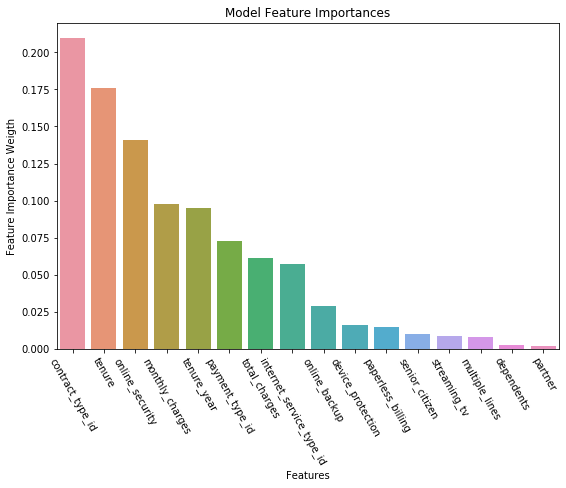

In [197]:
plt.figure(figsize=(9,6))
plt.title("Model Feature Importances")
ax = sns.barplot(x = features.index, y = features[0], data = features)
plt.xticks(rotation = -60)
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance Weigth")

- Estimate whether or not a customer would churn using the training data

In [109]:
y_pred_rf = rf.predict(X_train_rf)

- Estimate the probability of a customer churning using the training data

In [110]:
y_pred_proba_rf = rf.predict_proba(X_train_rf)

**Evaluate the results using the model score, confusion matrix, and classification report**

- Compute the Accuracy

In [111]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_rf, y_train_rf)))

Accuracy of random forest classifier on training set: 0.81


- Create a confusion matrix

In [112]:
cm = (confusion_matrix(y_train_rf, y_pred_rf))
cm

array([[3819,  314],
       [ 772,  720]])

In [113]:
labels = sorted(y_train_rf.churn.unique())

pd.DataFrame(confusion_matrix(y_train_rf, y_pred_rf), index=labels, columns=labels)

,0,1
0,3819,314
1,772,720


- Create a classificaiton report

In [114]:
print(classification_report(y_train_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4133
           1       0.70      0.48      0.57      1492

    accuracy                           0.81      5625
   macro avg       0.76      0.70      0.72      5625
weighted avg       0.80      0.81      0.79      5625



- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [115]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, RECALL, or TRUE POSITIVE rate
TPR = TP/(TP+FN)
# Specificity or TRUE NEGATIVE rate
TNR = TN/(TN+FP) 
# PRECISION or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or FALSE POSITIVE rate
FPR = FP/(FP+TN)
# FALSE NEGATIVE rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall ACCURACY
ACC = (TP+TN)/(TP+FP+FN+TN)

- This Random Forest model produced an improvement over the baseline model specifically with the churned recall percentage. The classifiers are very good because they are picky and predict more of the "churners" which are "churners" correct. False negative in our case 

# Test & Transform Final Model

**Task:** Only predict with the test data, do not fit in this process

- Estimate whether or not a customer would churn using the test data

In [116]:
y_pred_rf_test = rf.predict(X_test_rf)

- Estimate the probability of a customer churning using the test data

In [117]:
y_pred_proba_rf_test = rf.predict_proba(X_test_rf)

**Summarize the test results using the model score, confusion matrix, and classification report**

- Compute the Accuracy

In [118]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_test_rf, y_test_rf)))

Accuracy of random forest classifier on training set: 0.79


- Create a confusion matrix

In [119]:
cm_test = (confusion_matrix(y_test_rf, y_pred_rf_test))
cm_test

array([[946,  84],
       [210, 167]])

In [120]:
labels = sorted(y_test_rf.churn.unique())

pd.DataFrame(confusion_matrix(y_test_rf, y_pred_rf_test), index=labels, columns=labels)

,0,1
0,946,84
1,210,167


- Create a classificaiton report

In [121]:
print(classification_report(y_test_rf, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1030
           1       0.67      0.44      0.53       377

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [124]:
FP = cm_test.sum(axis=0) - np.diag(cm_test)  
FN = cm_test.sum(axis=1) - np.diag(cm_test)
TP = np.diag(cm_test)
TN = cm_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, RECALL, or TRUE POSITIVE rate
TPR = TP/(TP+FN)
# Specificity or TRUE NEGATIVE rate
TNR = TN/(TN+FP) 
# PRECISION or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or FALSE POSITIVE rate
FPR = FP/(FP+TN)
# FALSE NEGATIVE rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall ACCURACY
ACC = (TP+TN)/(TP+FP+FN+TN)

## Create a csv file
- File that predicts churn for each customer

In [127]:
# Create new dataframe that mimics the modeling dataframe used

df_csv = df

In [128]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
internet_service_type_id    7032 non-null int64
payment_type_id             7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null object
dependents                  7032 non-null object
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
streaming_tv                7032 non-null object
streaming_movies            7032 non-null object
paperless_billing           7032 non-null object
monthly_charges 

In [129]:
# Set "customer_id" as the index

df_csv = df_csv.set_index('customer_id')

In [130]:
# Encode data just as in the final model dataframe using a function from prepare.py

df_csv = prepare.encoder_all_rf(df_csv)

In [131]:
# Split data 

X, y, X_train_rf, X_test_rf, y_train_rf, y_test_rf = prepare.split_my_data_csv(df_csv)

In [134]:
# Create a new dataframe that contains all the train data as one larger dataset

df_final = pd.concat([X_train_rf, X_test_rf])

In [133]:
df_final.head()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,streaming_tv,paperless_billing,monthly_charges,total_charges,tenure_year
customer_id,,,,,,,,,,,,,,,,
9070-BCKQP,2,4,3,0,1,0,72,2,2,0,2,2,1,110.15,7881.20,6.0
8029-XYPWT,2,3,3,1,1,0,71,2,2,2,2,2,1,115.05,8016.60,6.0
5276-KQWHG,2,1,1,1,0,0,2,0,0,0,0,0,1,69.60,131.65,1.0
5232-NXPAY,1,2,3,0,0,0,47,0,0,0,2,2,0,74.45,3510.30,4.0
9593-CVZKR,3,2,3,0,1,1,56,2,1,1,1,1,1,24.45,1385.85,5.0


In [137]:
# Ensure the df_csv dataframe's shape is correct

df_csv.shape

(7032, 17)

In [136]:
# Ensure the df_final dataframe does not contain the target variable

df_final.shape

(7032, 16)

In [141]:
# Create the Random Forest Object

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [142]:
# Fit the model

rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [144]:
# Create prediction
y_prediction = rf.predict(df_final)
y_prediction_proba = rf.predict_proba(df_final)

In [165]:
# New dataframe that contains the probabilites and predictions 

y_predictions = pd.DataFrame({'Probability': y_prediction_proba[:,1], 'Predictions': y_prediction})

In [166]:
# Ensure the y_predictions dataframe is the correct shape (2 columns)

y_predictions.shape

(7032, 2)

In [168]:
# Create the index to be the "customer_id"

y_predictions = y_predictions.set_index(df_csv.index)

In [170]:
y_predictions.head(5)

,Probability,Predictions
customer_id,,
0003-MKNFE,0.082532,0
0013-MHZWF,0.066709,0
0015-UOCOJ,0.635449,1
0023-HGHWL,0.080123,0
0032-PGELS,0.016853,0


In [171]:
# Create csv file

y_predictions.to_csv(r'probability_and_predictions.csv')

## Final analysis:

My recommendation from the analysis is to circulate this model to other departments at Telco for use by teams to simulate if certain segments of customers related to their operations are motivated to churn.

For a more exact view of which customers (indexed by customer id) are predicted to churn, open the csv file which exists on the github repository.